# DATASETS & DATALOADERS

编程处理数据时非常繁琐而且难以去维护；理想情况下，为了可读性和模块化我们的数据代码和我们的模型训练代码是解耦合的。PyTorch 提供了两个预加载数据的原语：`torch.utils.data.DataLoader` 和 `torch.utils.data.Dataset` 。`Dataset` 存储了数据和他们对应的标签，而 `DataLoader` 在 `Dataset` 上包了一层迭代器能够帮助我们轻易去处理数据。

## 加载数据集

这里使用 TorchVision 的 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 数据集。Fashion-MNIST 是 Zalando 的文章图片数据集，包含 60,000 条训练数据和 10,000 条测试数据。每一个样例包含一个 28 * 28 的灰度图像以及对应的类型。

加载数据集的方法有四个参数：
- `root` 训练/测试数据的存储路径
- `train` 声明训练/测试数据集
- `download=True` 当 `root` 参数不可用时从网络上下载数据
- `transform` 和 `target_transform` 指定特征和标签的转换

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 遍历和可视化数据

我们可以像列表一样索引 `Datasets`: `training_data[index]`。我们使用 `matplotlib` 去可视化训练数据

AttributeError: module 'matplotlib.pyplot' has no attribute 'aixs'

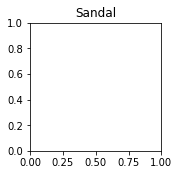

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.aixs("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
啊